In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pysynphot as S

/home/lovro/anaconda3/envs/pysynphot/lib/python3.7/site-packages/pysynphot/refs.py:118: UserWarning: No graph or component tables found; functionality will be SEVERELY crippled. No files found for /home/lovro/Programi/spectral_atlases/mtab/*_tmg.fits
  'functionality will be SEVERELY crippled. ' + str(e))
/home/lovro/anaconda3/envs/pysynphot/lib/python3.7/site-packages/pysynphot/refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /home/lovro/Programi/spectral_atlases/mtab/*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))


In [59]:
def plotter(g,m,t,n,ax):
    sp = S.Icat('k93models', t, m, g)
    ax[n].semilogy(sp.wave, sp.flux, label=str(round(t,1)))        
    return sp

In [62]:
teff_range = [3500., 50000.]
mh_range = [-2.,1.]
logg_range = [0, 5]

CPU times: user 19.1 s, sys: 212 ms, total: 19.3 s
Wall time: 19.3 s


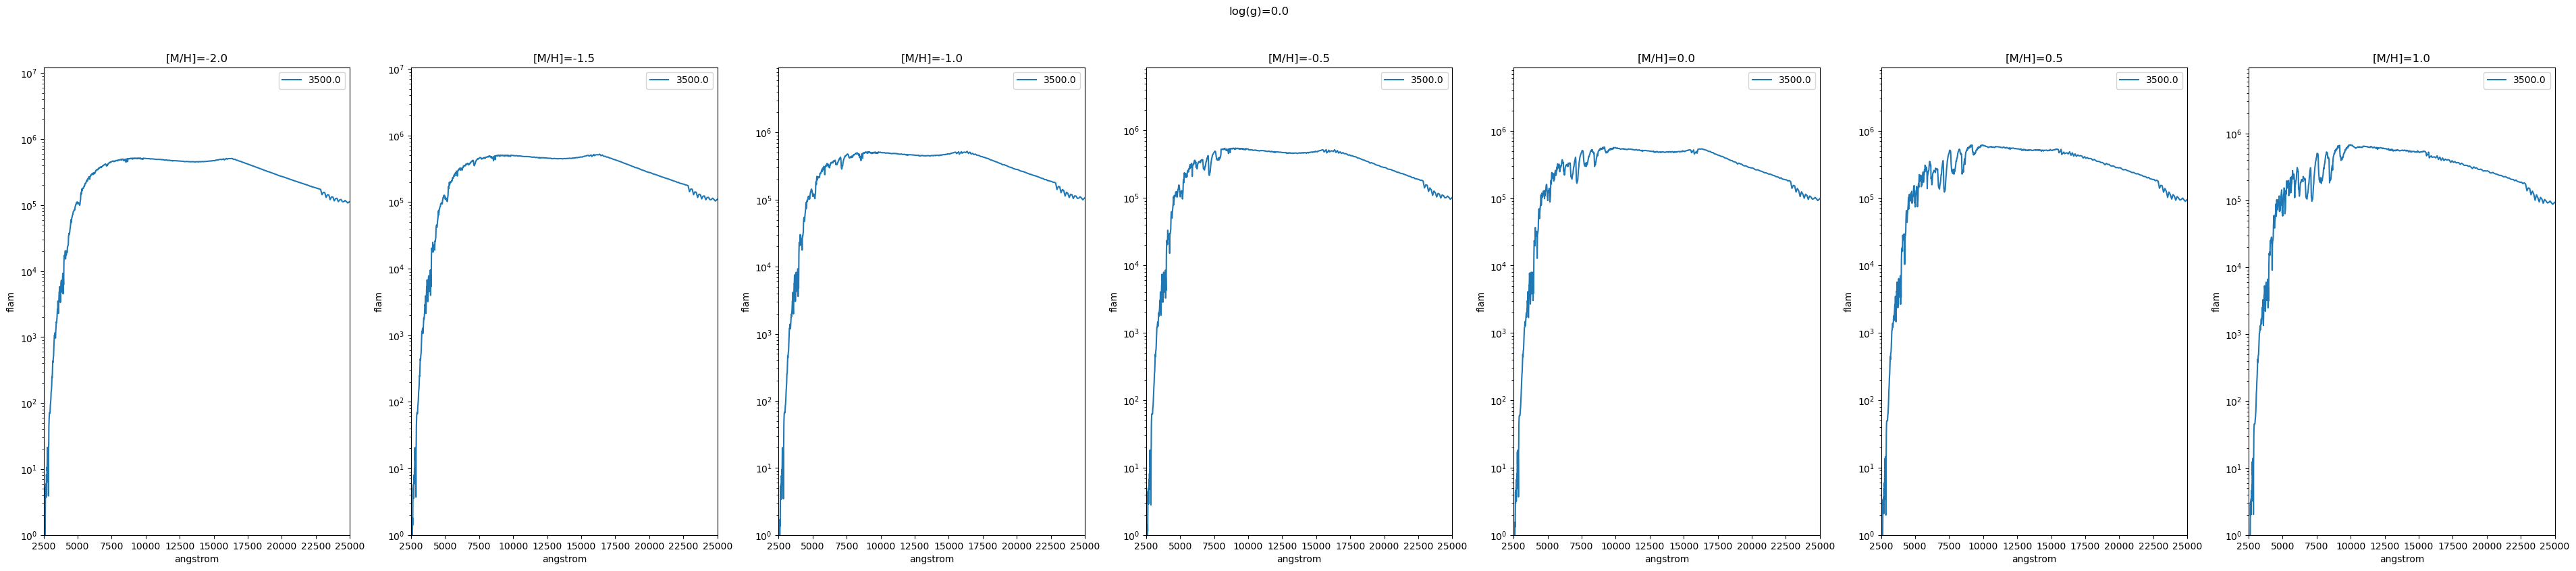

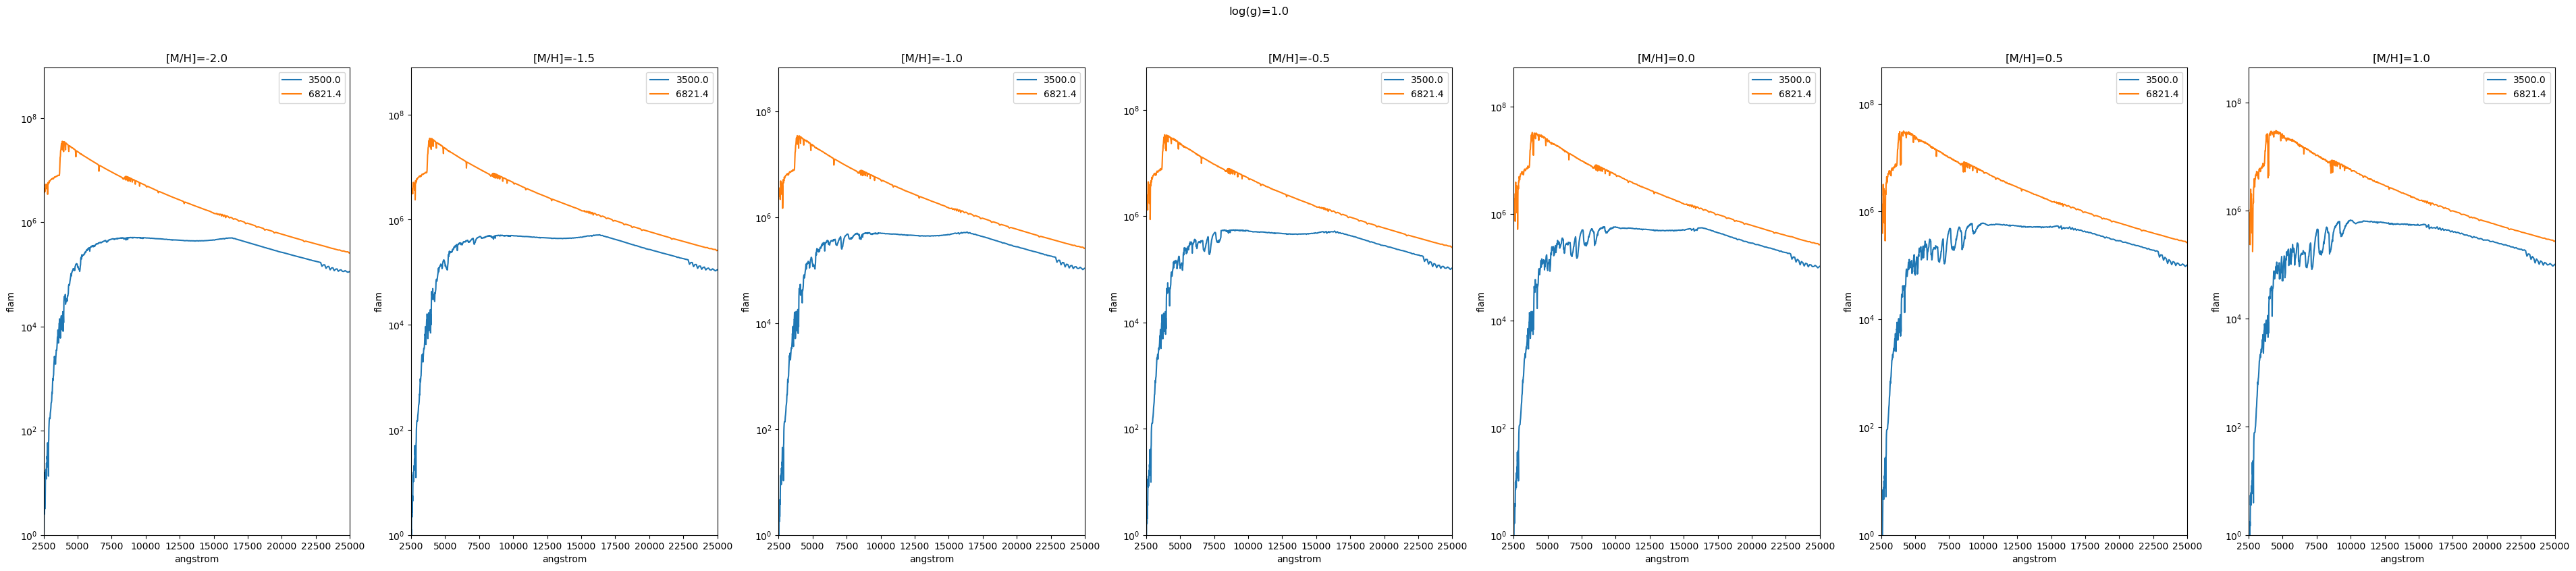

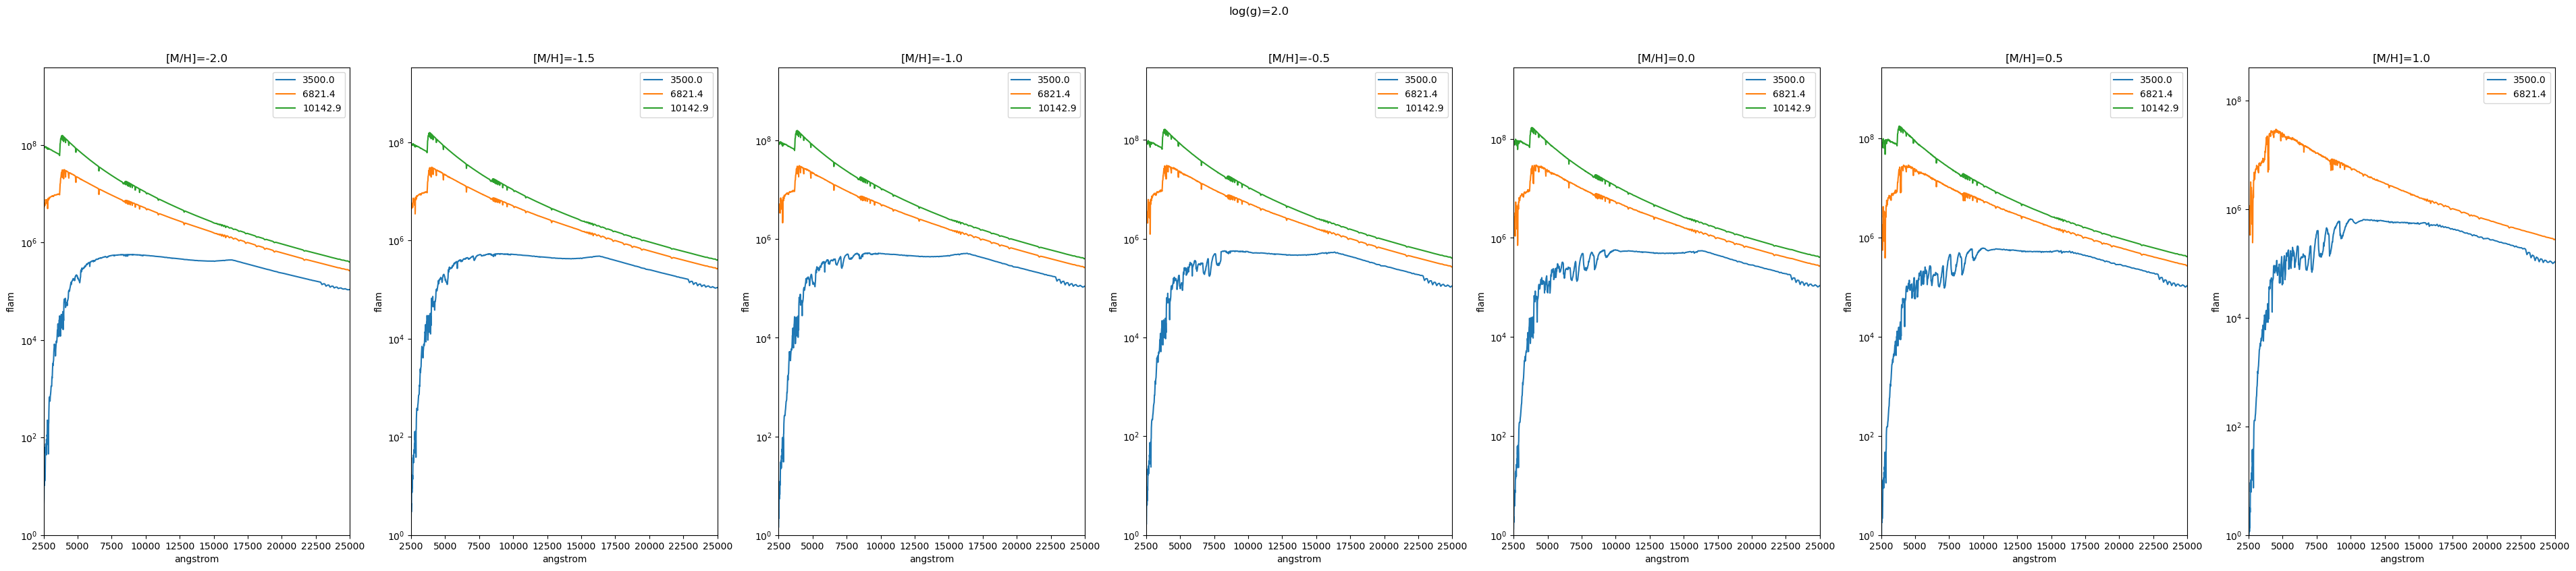

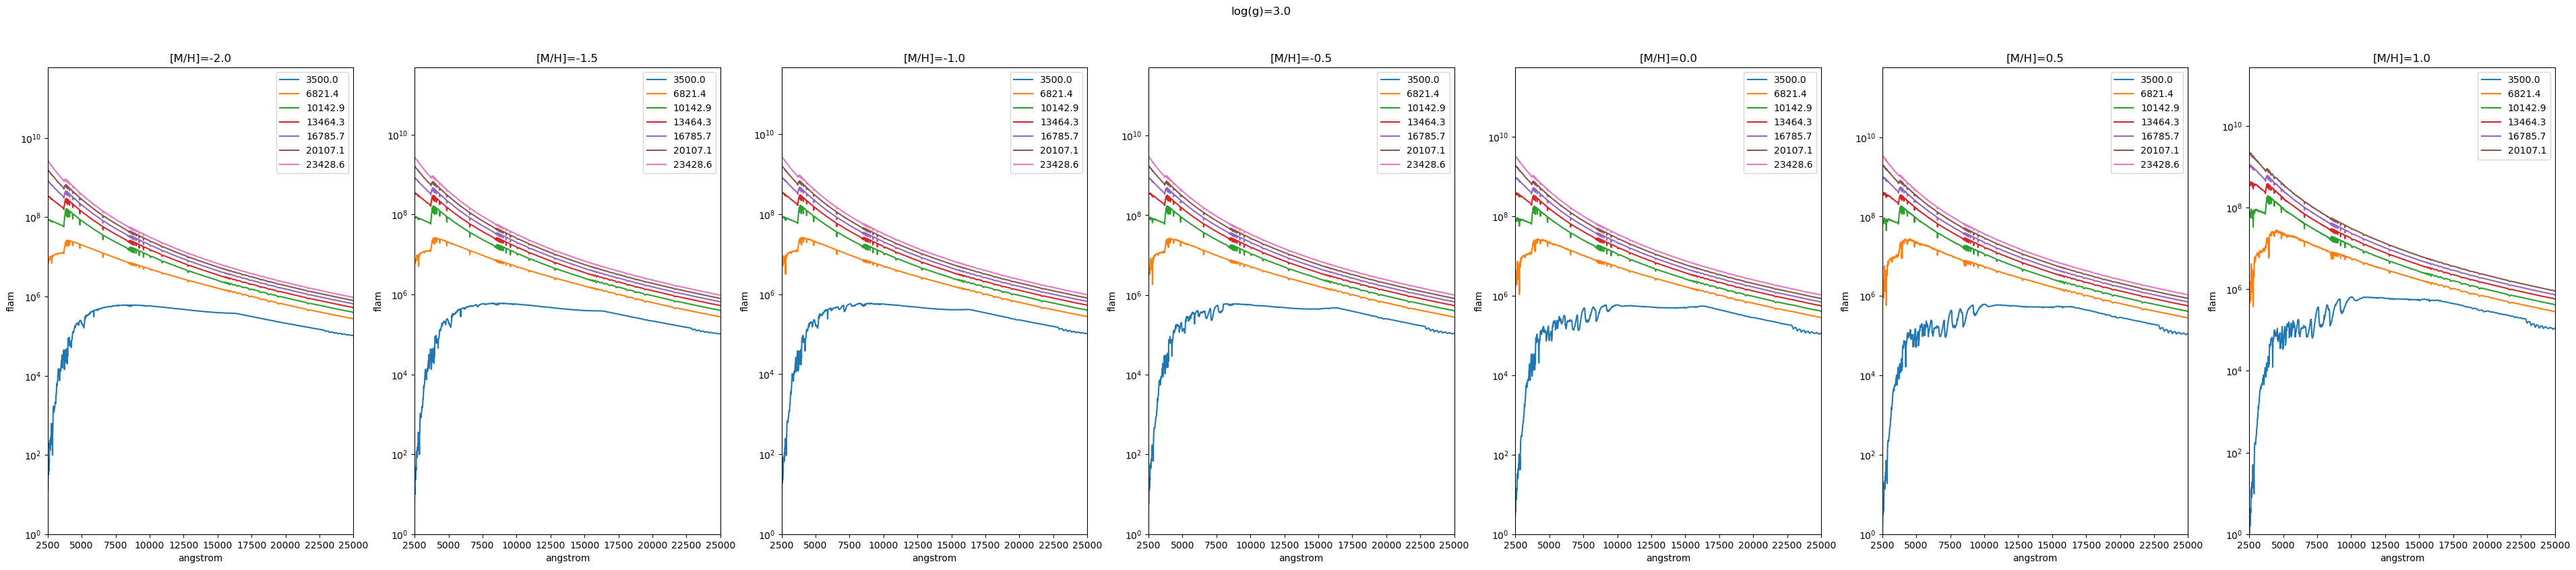

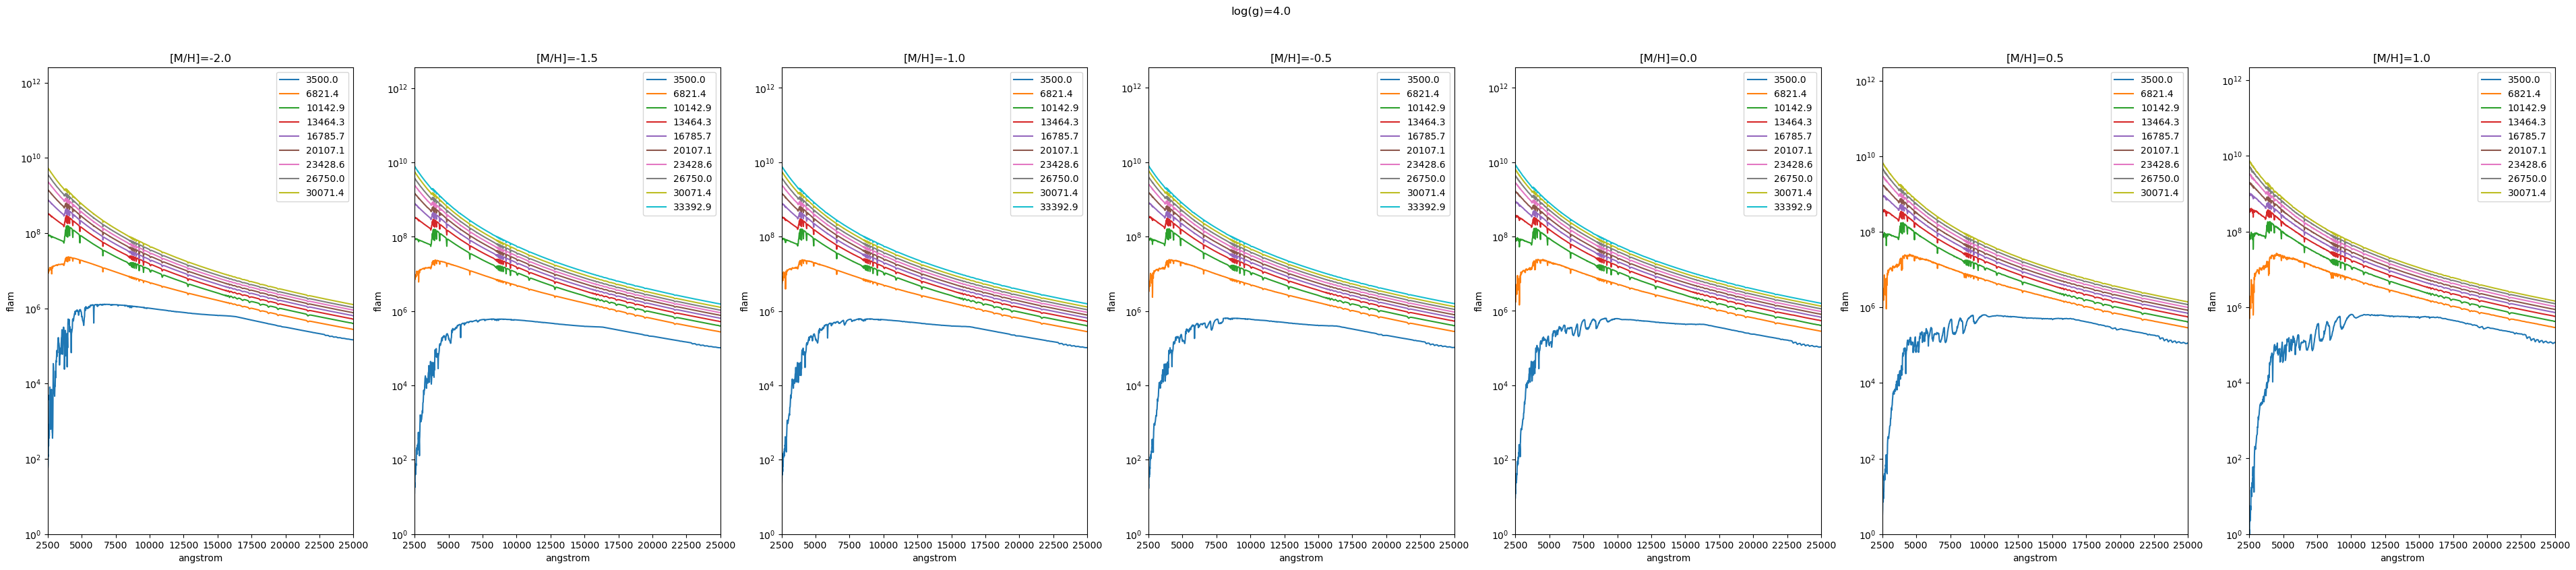

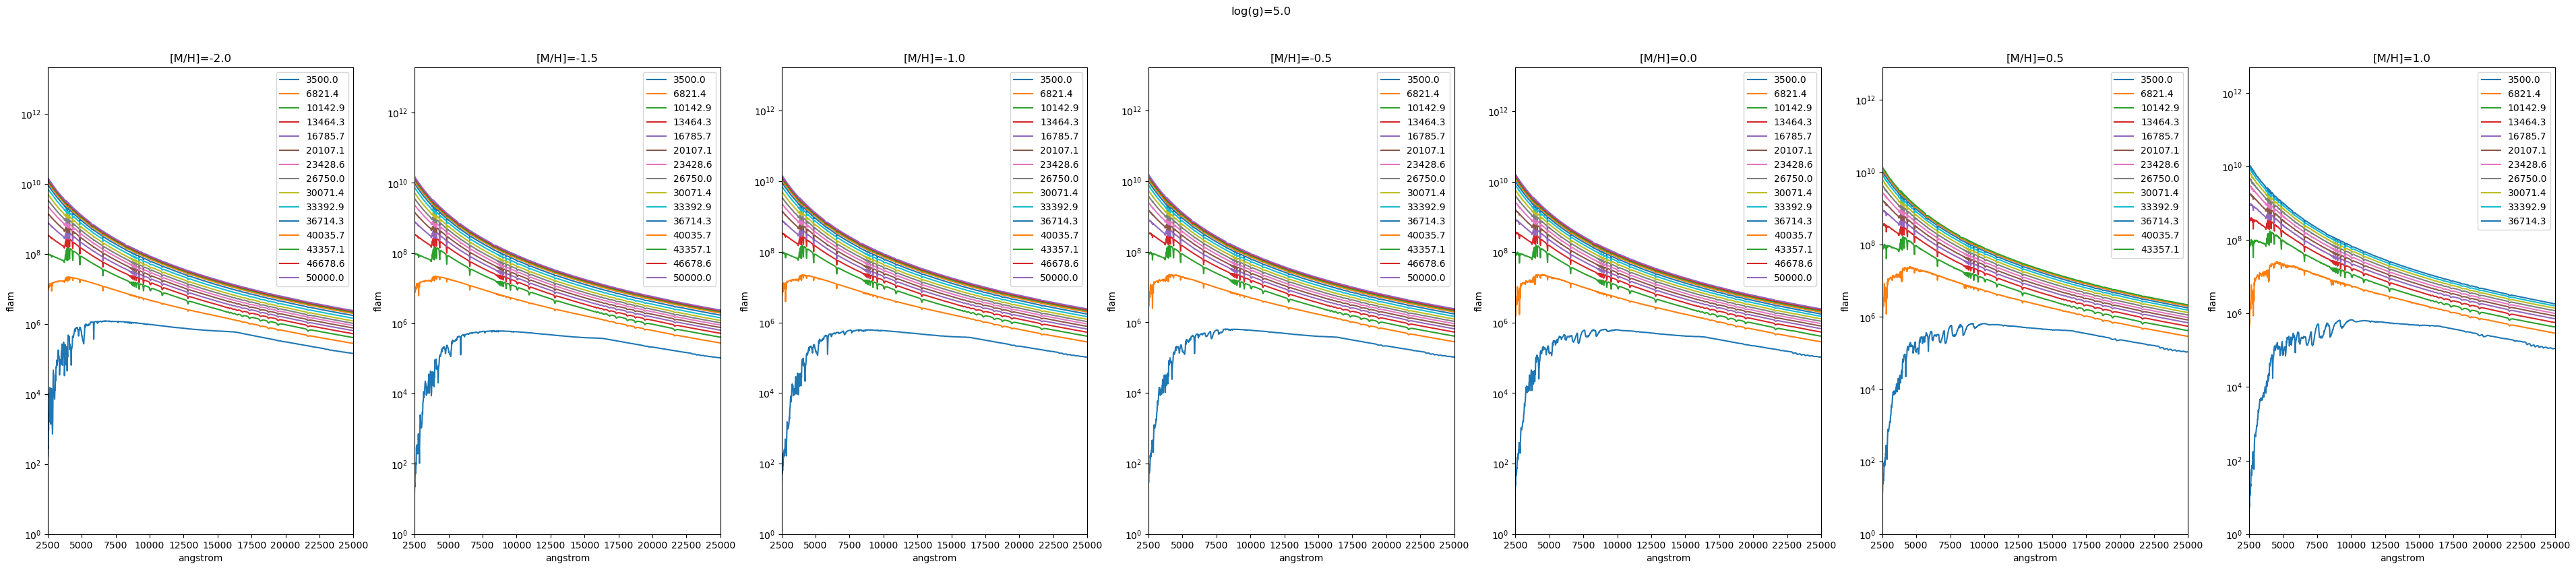

In [63]:
%%time
steps = [6, 7, 15]
for g in np.linspace(logg_range[0], logg_range[1], steps[0]):
    fig, ax = plt.subplots(1,steps[1], figsize=(16*3,9))
    plt.suptitle("log(g)="+str(g))
    for n, m in enumerate(np.linspace(mh_range[0], mh_range[1], steps[1])):
        ax[n].set_title("[M/H]="+str(m))
        for t in np.linspace(teff_range[0], teff_range[1], steps[2]):
            try:
                sp=plotter(g, m, t, n, ax)
            except:
                pass
        ax[n].set_xlim(2500, 25000)
        ax[n].set_ylim(bottom=1)
        ax[n].set_xlabel(sp.waveunits)
        ax[n].set_ylabel(sp.fluxunits)
        ax[n].legend()                